<a href="https://colab.research.google.com/github/Sravani-05/DLAssignment_3/blob/main/NN_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**3 layer Deep Neural Network for non linear Relu using only Numpy**


In [14]:
import numpy as np
import matplotlib.pyplot as plt

**Prepare Data**


In [15]:
# 3 Dimension non-linear input data

n = 200
d = 3
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[2, 1,-1],[3,0,-1],]).T
bias_true = np.array([0.5,0.1])

y_true = (x ** 2) @ weights_true + x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

x: (200, 3), weights: (3, 2), bias: (2,), y: (200, 2)


**Visualizing the data generated using TSNE**

In [16]:
from sklearn.manifold import TSNE
view = TSNE(n_components=2, n_jobs=5).fit_transform(x)
view.shape

(200, 2)

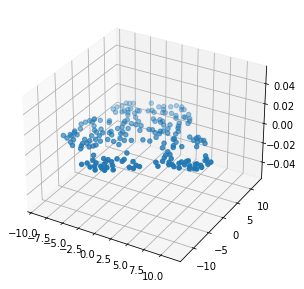

In [17]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
#y_pred = y_pred.astype('int')
fig = plt.figure(figsize=(10,5))
tsne = fig.add_subplot(111, projection='3d')
tsne.scatter(*zip(*view))
plt.show()

In [19]:
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    # print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient


class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    #output = (x ** 2) @ weights_true + x @ weights_true + bias_true
    return output

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

**Adding non-linearity: Relu**

In [20]:
# In order to learn non-linear functions, we need non-linearities in our model.

class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
      # import pdb; pdb.set_trace()  # By the way, this is how you can debug
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient


relu = Relu()
input_ = np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1)
print(relu(input_))
print(relu.backward(input_))

[[1. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
[[ 1. ]
 [ 0.5]
 [ 0. ]
 [-0. ]
 [-0. ]]


**Train our new non linear model**

In [21]:
class Model:
  def __init__(self, input_dim, num_hidden, output_dim):
    self.linear1 = Linear(input_dim, num_hidden)
    self.relu1 = Relu()
    self.relu2 = Relu()
    self.linear2 = Linear(num_hidden, output_dim)
  
  def __call__(self, x):
    l1 = self.linear1(x)
    r1 = self.relu1(l1)
    r2 = self.relu2(r1)
    l2 = self.linear2(r2)
    return l2
  
  def backward(self, output_gradient):
    linear2_gradient = self.linear2.backward(output_gradient)
    relu2_gradient = self.relu2.backward(linear2_gradient)
    relu1_gradient = self.relu1.backward(relu2_gradient)
    linear1_gradient = self.linear1.backward(relu1_gradient)
    # print('Model backward', linear2_gradient.shape, relu_gradient.shape, linear1_gradient.shape)
    # import pdb; pdb.set_trace()
    return linear1_gradient

  def update(self, lr):
    self.linear2.update(lr)
    self.linear1.update(lr)

loss = MSE()
model = Model(d, 10,output_dim=2)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
#plot_3d(x, y_true, y_pred)

4.352946475598373


array([[ 1.40262369e-02, -8.46874411e-02,  4.33634835e-02],
       [ 1.28391442e-02, -2.41600055e-02,  1.47695186e-02],
       [-2.81462567e-04, -6.04045805e-03,  2.02049957e-02],
       [ 2.71231019e-03,  2.86862065e-03,  2.03941225e-03],
       [ 2.84012457e-03, -1.27554632e-02,  5.73376199e-03],
       [ 1.52108472e-02, -9.04189751e-02,  4.56250176e-02],
       [ 2.66350289e-02, -1.33156454e-01,  8.51129446e-03],
       [-1.61960072e-02, -5.57524585e-03, -2.26580399e-03],
       [ 5.49103854e-05,  2.49213815e-04, -8.18053476e-04],
       [ 2.51238090e-02, -4.64346204e-02, -5.54203590e-03],
       [ 1.95465846e-02,  4.03895028e-03,  1.70758045e-02],
       [ 2.33580966e-02, -9.76376897e-02, -1.37333719e-03],
       [ 3.43421699e-03, -1.13432987e-02, -2.13544614e-04],
       [ 6.27848679e-03, -1.94097208e-02,  1.97739445e-02],
       [ 3.44188450e-02, -7.51666722e-02, -2.85765327e-03],
       [-2.50411207e-04,  4.20328066e-03,  4.79167479e-04],
       [ 3.74876244e-03,  1.66931688e-02

In [22]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

Initializing non-linear and loss for three dimensional data
3-d input and 2-d output with 2 hidden layers, 10 neurons for hidden layers

In [23]:
loss = MSE()
nonlinear = Model(3,20,2)
y_pred = nonlinear(x)
print(x.shape, weights_true.shape, y_true.shape, y_pred.shape)
print(loss(y_pred,y_true))
     

(200, 3) (3, 2) (200, 2) (200, 2)
3.1770667564448405


In [24]:
fit(x, y_true, model=nonlinear, loss=loss, lr=0.1, num_epochs=400)
y_pred = nonlinear(x)

Epoch 0, loss 3.1770667564448405
Epoch 1, loss 2.436220287385152
Epoch 2, loss 1.9753136727257947
Epoch 3, loss 1.6376142335907053
Epoch 4, loss 1.3811192089567734
Epoch 5, loss 1.1876950293751534
Epoch 6, loss 1.0460027757173607
Epoch 7, loss 0.9387150684721712
Epoch 8, loss 0.8527336860567603
Epoch 9, loss 0.7825126492702671
Epoch 10, loss 0.7245185351931442
Epoch 11, loss 0.6733424480452337
Epoch 12, loss 0.626938439028775
Epoch 13, loss 0.5842855579344967
Epoch 14, loss 0.5451961981364184
Epoch 15, loss 0.5084475527339491
Epoch 16, loss 0.4748348283843338
Epoch 17, loss 0.44378781196859135
Epoch 18, loss 0.4146512619507822
Epoch 19, loss 0.38759468390783447
Epoch 20, loss 0.3618779472901153
Epoch 21, loss 0.3382234204430996
Epoch 22, loss 0.3163128795189241
Epoch 23, loss 0.2960343152020299
Epoch 24, loss 0.2773488367700574
Epoch 25, loss 0.26006692005781645
Epoch 26, loss 0.24414459982102993
Epoch 27, loss 0.22940865615996964
Epoch 28, loss 0.21576362615310946
Epoch 29, loss 0.203

In [25]:
print(f'x: {x.shape}, y: {y_true.shape}, y1: {y_pred.shape}')
print(y_true)
print(y_pred)

x: (200, 3), y: (200, 2), y1: (200, 2)
[[ 1.84877003e+00  2.25767571e+00]
 [ 7.02713253e-01  7.14540200e-01]
 [ 1.81817169e+00  1.07550496e+00]
 [-5.62914000e-01 -9.50960215e-01]
 [-9.66610962e-02 -4.94794172e-01]
 [ 2.10860042e+00  2.61548031e+00]
 [ 3.58206176e+00  5.32979420e+00]
 [ 6.60073825e-03 -4.51936527e-01]
 [ 5.59033740e-01 -3.52457802e-01]
 [ 5.03926544e-01  1.14176656e+00]
 [ 1.58635620e+00  2.25314923e+00]
 [ 1.96861392e+00  3.60609694e+00]
 [ 4.50080149e-01  2.83083187e-01]
 [ 2.20044798e+00  2.18315067e+00]
 [ 2.09660678e+00  2.62838897e+00]
 [ 5.67994503e-02 -1.04452694e+00]
 [ 6.17876884e-01 -4.06600294e-01]
 [ 1.82163419e+00 -1.52100405e-01]
 [ 1.84982102e+00 -4.33060109e-01]
 [ 6.77736576e-01 -3.69519593e-01]
 [ 1.09935718e-01 -4.33192259e-01]
 [ 1.98332549e+00  2.82004405e+00]
 [ 1.64232539e-01 -3.04028739e-01]
 [ 3.73691912e-01  2.55369579e-01]
 [-3.26490896e-02 -3.00289472e-01]
 [ 4.82358590e+00  5.26374768e+00]
 [ 3.23531814e+00  2.13465360e+00]
 [ 1.90319771e-0

In [27]:
print(f'x: {x.shape}, y: {y_true.shape}, y1: {y_pred.shape}')
print(y_true)
print(y_pred)

x: (200, 3), y: (200, 2), y1: (200, 2)
[[ 1.84877003e+00  2.25767571e+00]
 [ 7.02713253e-01  7.14540200e-01]
 [ 1.81817169e+00  1.07550496e+00]
 [-5.62914000e-01 -9.50960215e-01]
 [-9.66610962e-02 -4.94794172e-01]
 [ 2.10860042e+00  2.61548031e+00]
 [ 3.58206176e+00  5.32979420e+00]
 [ 6.60073825e-03 -4.51936527e-01]
 [ 5.59033740e-01 -3.52457802e-01]
 [ 5.03926544e-01  1.14176656e+00]
 [ 1.58635620e+00  2.25314923e+00]
 [ 1.96861392e+00  3.60609694e+00]
 [ 4.50080149e-01  2.83083187e-01]
 [ 2.20044798e+00  2.18315067e+00]
 [ 2.09660678e+00  2.62838897e+00]
 [ 5.67994503e-02 -1.04452694e+00]
 [ 6.17876884e-01 -4.06600294e-01]
 [ 1.82163419e+00 -1.52100405e-01]
 [ 1.84982102e+00 -4.33060109e-01]
 [ 6.77736576e-01 -3.69519593e-01]
 [ 1.09935718e-01 -4.33192259e-01]
 [ 1.98332549e+00  2.82004405e+00]
 [ 1.64232539e-01 -3.04028739e-01]
 [ 3.73691912e-01  2.55369579e-01]
 [-3.26490896e-02 -3.00289472e-01]
 [ 4.82358590e+00  5.26374768e+00]
 [ 3.23531814e+00  2.13465360e+00]
 [ 1.90319771e-0

Text(0, 0.5, 't-SNE-2')

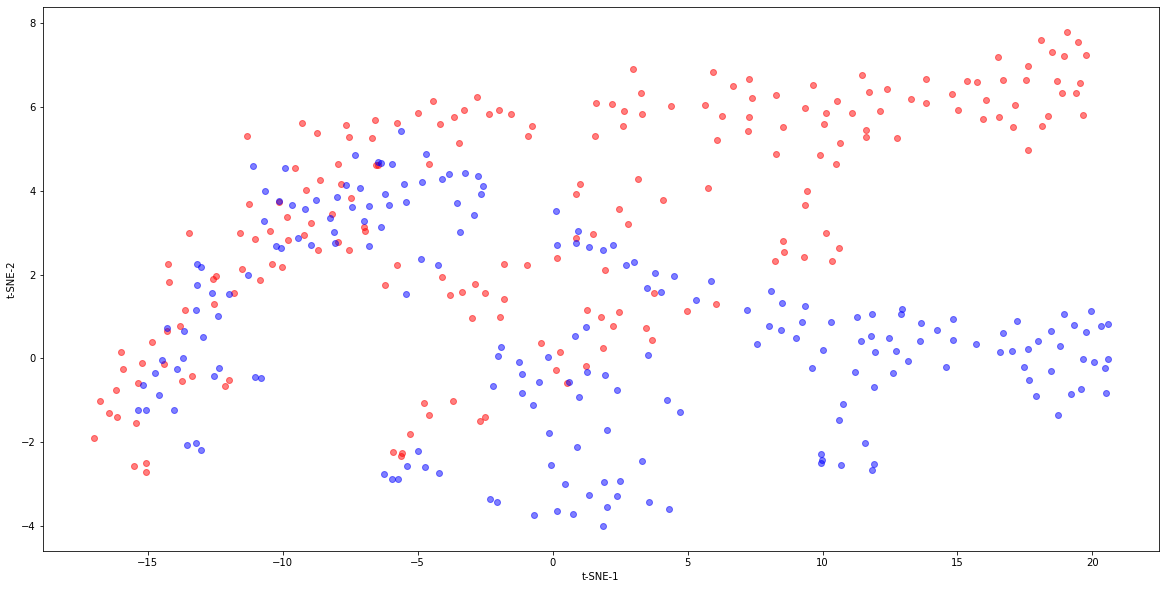

In [28]:
 from sklearn.manifold import TSNE
 view_true = TSNE(n_components=2, random_state=0).fit_transform(y_true)
 view_pred = TSNE(n_components=2, random_state=0).fit_transform(y_pred)
 #y_pred = y_pred.astype('int')
 plt.figure(figsize=(20,10))
 plt.scatter(view_true[:,0], view_true[:,1], c='r', alpha=0.5)
 plt.scatter(view_pred[:,0], view_pred[:,1], c='b', alpha=0.5)
 plt.xlabel('t-SNE-1')
 plt.ylabel('t-SNE-2')